## DA_Fall21_HW_2 
### Due Date: 11/11 before Mid-night
### Linear Regression and Logistisc Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Part 1 of this HW is on building a Linear Regression model using housing data and a Logistic Regression model.

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [2]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


***Follow the standard way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

Income                  0.639734
HouseAge                0.452543
NumberOfRooms           0.335664
AreaNumberOfBedrooms    0.171071
Population              0.408556
Price                   1.000000
Name: Price, dtype: float64
income is a factor that affects the house price most


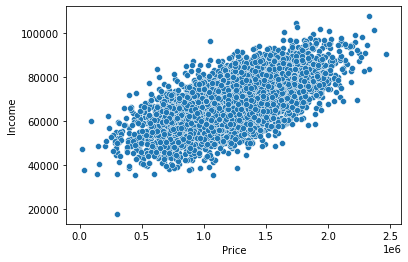

In [3]:
# sns.pairplot(housing)
sns.scatterplot(y='Income',x='Price' ,data=housing)
print(housing.corr()['Price'])
print("income is a factor that affects the house price most")

<AxesSubplot:xlabel='Price', ylabel='HouseAge'>

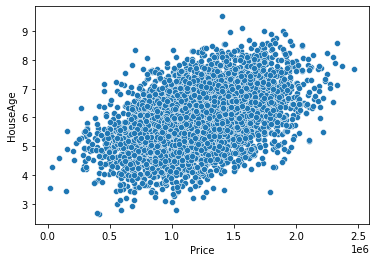

In [4]:
sns.scatterplot(y='HouseAge',x='Price' ,data=housing)

<AxesSubplot:xlabel='Price', ylabel='NumberOfRooms'>

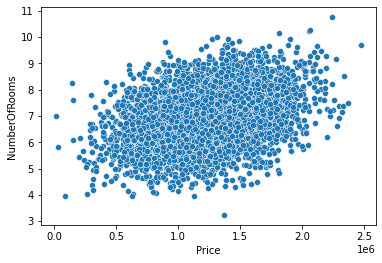

In [5]:
sns.scatterplot(y='NumberOfRooms',x='Price' ,data=housing)

<AxesSubplot:xlabel='Price', ylabel='Population'>

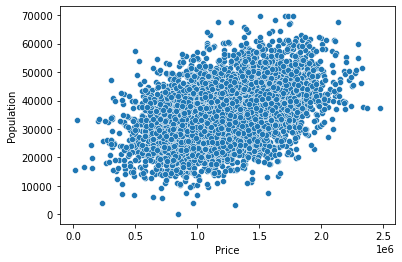

In [6]:
sns.scatterplot(y='Population',x='Price' ,data=housing)

<AxesSubplot:xlabel='Price', ylabel='AreaNumberOfBedrooms'>

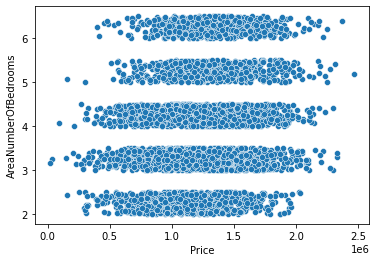

In [7]:
sns.scatterplot(y='AreaNumberOfBedrooms',x='Price' ,data=housing)

Mean Squared Error: 74084394120.77266
R-squared: 0.4006059806785851


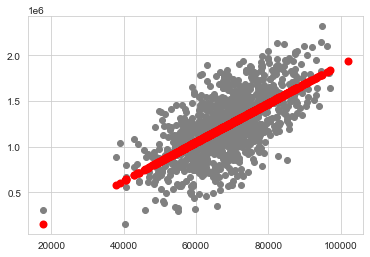

Trial 0, R-squared: 0.40096164357214037
Trial 1, R-squared: 0.4219184423864465
Trial 2, R-squared: 0.3941115518957381
Trial 3, R-squared: 0.4253937558971399
Trial 4, R-squared: 0.3983889032285711
Trial 5, R-squared: 0.43194608883199304
Trial 6, R-squared: 0.4526605118920237
Trial 7, R-squared: 0.4218441391568596
Trial 8, R-squared: 0.4114125378859024
Trial 9, R-squared: 0.3939388329896295
Mean of Rsquare is 0.41525764077364447， my model does pass the cross-validation.


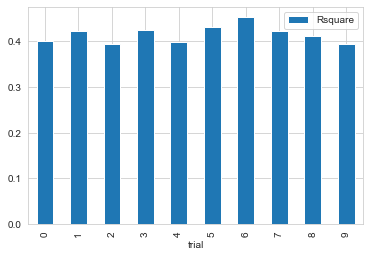

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import random

# Step 2:Build a model
X = housing['Income'].values.reshape(-1, 1)
Y = housing['Price'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)

# step 3：print MSE，R-square
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred1))

# step 4:plot the line
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred1, color='red', linewidth=2)
plt.show()

# step 5:10-fold cross validation
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {}'.format(i, metrics.r2_score(Y_test, Y_pred)))

rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')


print('Mean of Rsquare is {}， my model does pass the cross-validation.'.format(rdf['Rsquare'].mean()) )



In [35]:
# step 6:adding one variable
X = housing[['Income','HouseAge']].values.reshape(-1, 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred3 = model.predict(X_test)

print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred3))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred3))


housing.corr()

#step 6:Explain your reason why you choose that variable.
print("The reason I chose second variable --HouseAge is because lowest correlation with the first factor, but with high enough correlation with the dependent variable")


Mean Squared Error: 48062437588.67756
R-squared: 0.6111416177920193
The reason I chose second variable --HouseAge is because lowest correlation with the first factor, but with high enough correlation with the dependent variable


### Part 2: Build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [10]:
# Load the dataset
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [11]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [12]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [13]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


In [14]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [15]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


### let's group by has or no affairs rows

In [16]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb
had_affair,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758
1,3.619555,30.537019,10.770389,1.686515,2.290547,13.876274,3.796108


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

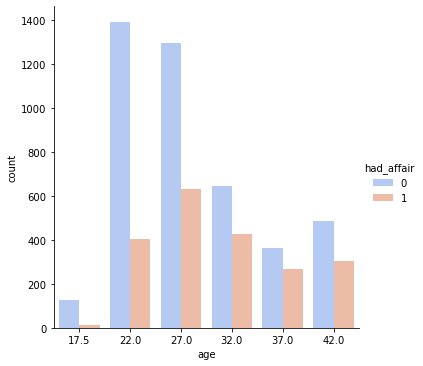

In [17]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

***Follow the standard proper way of building a model and in particular,***

1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Build Logistic Regression model with all the numerical variables.
4. Print out the model performance metrics (precision/recall)
5. Do a countplot on the categorical variables
6. Call the get_dummies method to create the dummies variables for the categorical variables
7. Build another Logistic Regression model that include these dummies variabes.
8. Comment on your results based on the performance metrics

***Part 2: Type your code and answers here***

<AxesSubplot:>

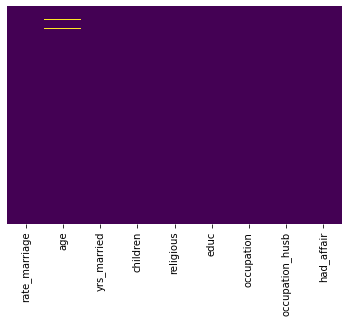

In [18]:
# Step 1
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

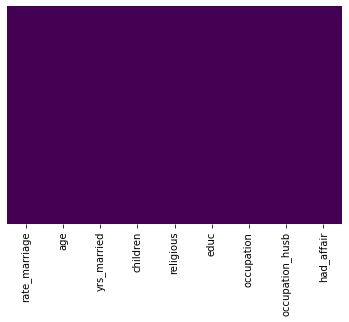

In [19]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# df.shape

In the graph, the ratio between had_affair=0 and had_affair=1 shows that the more children people have, the higher chance that peopele will have affair 


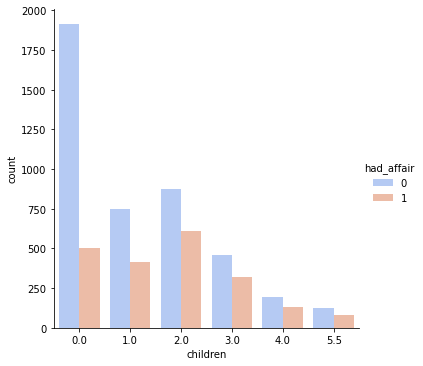

In [20]:
# Step 2 Use Factorplot for number of years of marriage
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')
print('In the graph, the ratio between had_affair=0 and had_affair=1 shows that the more children people have, the higher chance that peopele will have affair ')

In the graph, the ratio between had_affair=0 and had_affair=1 shows that the longer years of marriage, the higher chance that peopele will have affair 


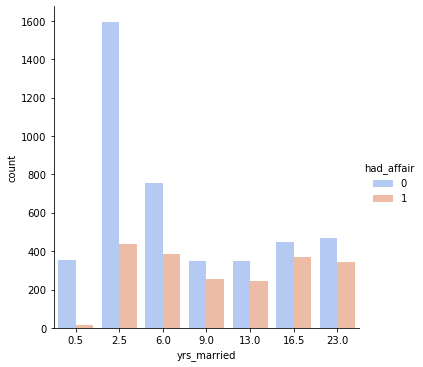

In [21]:
# Step 2 Use Factorplot for number of children
sns.factorplot('yrs_married',kind='count', hue='had_affair',data=df,palette='coolwarm')
print('In the graph, the ratio between had_affair=0 and had_affair=1 shows that the longer years of marriage, the higher chance that peopele will have affair ')

In [22]:
# step 3:Build Logistic Regression model
# print(df.head())
X = df[['age','yrs_married','children']].values.reshape(-1,3)
Y = df['had_affair'].values.reshape(-1,1)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

# step 4:Print out precision/recall
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       885
           1       0.38      0.17      0.23       389

    accuracy                           0.66      1274
   macro avg       0.54      0.52      0.51      1274
weighted avg       0.61      0.66      0.62      1274

0.6632653061224489


   rate_marriage   age  yrs_married  children  religious  educ occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0       occ2   
1            3.0  27.0         13.0       3.0        1.0  14.0       occ3   
2            4.0  22.0          2.5       0.0        1.0  16.0       occ3   
3            4.0  37.0         16.5       4.0        3.0  16.0       occ5   
4            5.0  27.0          9.0       1.0        1.0  14.0       occ3   

   occupation_husb  had_affair  
0              5.0           1  
1              4.0           1  
2              5.0           1  
3              5.0           1  
4              4.0           1  


<AxesSubplot:xlabel='had_affair', ylabel='count'>

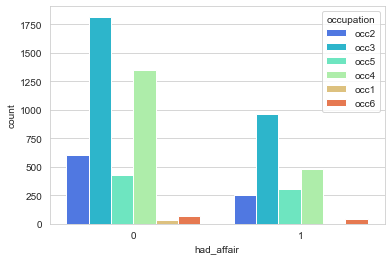

In [24]:
# step 5:Do a countplot on the categorical variables
print(df.head())
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation',data=df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

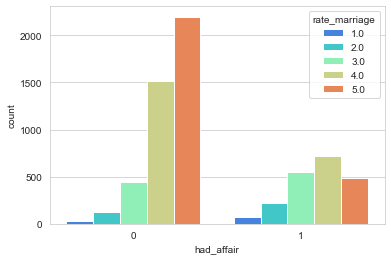

In [25]:
sns.countplot(x='had_affair',hue='rate_marriage',data=df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

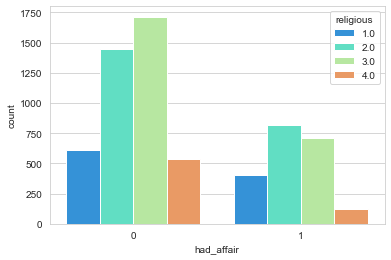

In [26]:
sns.countplot(x='had_affair',hue='religious',data=df,palette='rainbow')


<AxesSubplot:xlabel='had_affair', ylabel='count'>

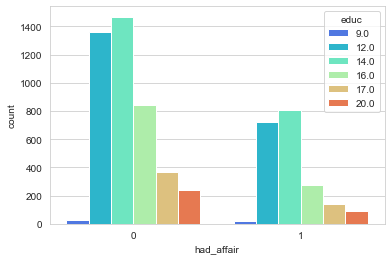

In [27]:
sns.countplot(x='had_affair',hue='educ',data=df,palette='rainbow')


<AxesSubplot:xlabel='had_affair', ylabel='count'>

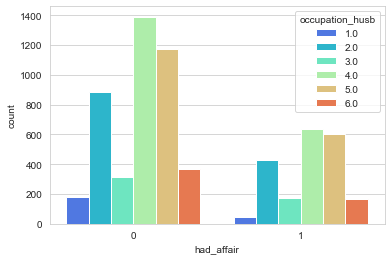

In [28]:
sns.countplot(x='had_affair',hue='occupation_husb',data=df,palette='rainbow')

In [29]:
# step 6:create the dummies variables


new_rate_marriage =pd.get_dummies(df['rate_marriage'],drop_first=True)
new_occupation = pd.get_dummies(df['occupation'],drop_first=True)
new_religious = pd.get_dummies(df['religious'],drop_first=True)
new_educ = pd.get_dummies(df['educ'],drop_first=True)
new_occupation_husb = pd.get_dummies(df['occupation_husb'],drop_first=True)


In [30]:
# step 7:Build another Logistic Regression model
train=df[['age','yrs_married','children','had_affair']]
train = pd.concat([train, new_occupation,new_religious,new_educ,new_occupation_husb,new_rate_marriage], axis=1)


In [31]:
# step 8:Comment on your results based on the performance metrics
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.20, 
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
Y_pred5 = model.predict(X_test)
print(classification_report(y_test,Y_pred5))
print(accuracy_score(y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       885
           1       0.59      0.36      0.45       389

    accuracy                           0.73      1274
   macro avg       0.68      0.63      0.64      1274
weighted avg       0.71      0.73      0.71      1274

0.7291993720565149


After adding categorical variables to the model:
1. The F1-score help improve our model from 78% to 82% (when had_affair=1) and from 23% to 45% (when had_affair=0)    
2. Accuacy score increase form 66% to 72.9%

Therefore including categorical variables did help improve the model. 